# 환경설정

pip install mlxtend --upgrade --no-deps

In [1]:
import csv
import pandas as pd
import random
from datetime import datetime
from collections import defaultdict
import seaborn as sns
import numpy as np

from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

from matplotlib import pyplot as plt
%matplotlib inline

# 01. 토이 데이터로 Association Rule 구현
- 10개의 transaction으로 이루어진 데이터를 활용하여 association rule을 간단하게 구현해보자
- support, confidence, lift 값을 직접 구해보자

In [2]:
path = "../data/transaction.csv"
trans_list_set = []
with open(path, 'r') as file:
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        trans_list_set.append(set(line))
        
trans_length = len(trans_list_set)
trans_list_set

[{'Bread', 'Milk'},
 {'Beer', 'Bread', 'Diapers', 'Eggs'},
 {'Beer', 'Cola', 'Diapers', 'Milk'},
 {'Beer', 'Bread', 'Diapers', 'Milk'},
 {'Bread', 'Cola', 'Diapers', 'Milk'},
 {'Bread', 'Milk'},
 {'Beer', 'Bread', 'Cola', 'Milk'},
 {'Beer', 'Bread', 'Cola', 'Milk'},
 {'Beer', 'Bread', 'Diapers', 'Milk'},
 {'Beer', 'Bread', 'Diapers'}]

- **`frozenset`**을 사용하는 이유: 우리가 필요한 itemset은 python에서 제공하는 set과 동일하다. 그러나 frozenset은 immutable한 불변객체이므로 새로운 아이템의 추가나 삭제가 불가능하다. 때문에 이를 사용하고 pandas에도 value값으로 사용할 수 있다.

#### 1-itemset 생성하기

In [3]:
item_set = set()
for line in trans_list_set:
    for item in line:
        item_set.add(frozenset([item]))
    
item_set

{frozenset({'Beer'}),
 frozenset({'Bread'}),
 frozenset({'Diapers'}),
 frozenset({'Milk'}),
 frozenset({'Eggs'}),
 frozenset({'Cola'})}

## support 계산, frequent itemset 구하기

In [5]:
min_support = 0.2
support_dict = defaultdict(float)

#### 1-itemset의 frequent itemset 계산

In [6]:
one_freq_set = set()
one_freq_dict = defaultdict(int)

#### 1-itemset의 support count 계산

In [7]:
for item in item_set:
    one_freq_dict[item] += sum([1 for trans in trans_list_set if item.issubset(trans)])

#### minimum support 이상의 itemset만 보존시킨다

In [9]:
n = len(trans_list_set)
for item, cnt in one_freq_dict.items():
    support = float(cnt) / n
    
    if support >= min_support:
        one_freq_set.add(item)
        support_dict[item] = support
        
support_dict

defaultdict(float,
            {frozenset({'Beer'}): 0.7,
             frozenset({'Bread'}): 0.9,
             frozenset({'Diapers'}): 0.6,
             frozenset({'Milk'}): 0.8,
             frozenset({'Cola'}): 0.4})

## 2-frequency itemset

In [11]:
k = 2
two_item_set = set([term1.union(term2) for term1 in one_freq_set for term2 in one_freq_set if len(term1.union(term2)) == k])

two_freq_set = set()
two_freq_dict = defaultdict(int)

# 2-itemset의 support count 계산
for item in two_item_set:
    two_freq_dict[item] += sum([1 for trans in trans_list_set if item.issubset(trans)])
    
# min support 이상의 itemset만 보존시킨다
n = len(trans_list_set)
for item, cnt in two_freq_dict.items():
    support = float(cnt) / n
    if support >= min_support:
        two_freq_set.add(item)
        support_dict[item] = support
        
support_dict

defaultdict(float,
            {frozenset({'Beer'}): 0.7,
             frozenset({'Bread'}): 0.9,
             frozenset({'Diapers'}): 0.6,
             frozenset({'Milk'}): 0.8,
             frozenset({'Cola'}): 0.4,
             frozenset({'Beer', 'Milk'}): 0.5,
             frozenset({'Cola', 'Milk'}): 0.4,
             frozenset({'Cola', 'Diapers'}): 0.2,
             frozenset({'Beer', 'Diapers'}): 0.5,
             frozenset({'Beer', 'Cola'}): 0.3,
             frozenset({'Diapers', 'Milk'}): 0.4,
             frozenset({'Beer', 'Bread'}): 0.6,
             frozenset({'Bread', 'Cola'}): 0.3,
             frozenset({'Bread', 'Milk'}): 0.7,
             frozenset({'Bread', 'Diapers'}): 0.5})

## 3-frequency itemset

In [12]:
k = 3

# 2-itemset을 사용해서 후보 3-itemset 생성
three_item_set = set([term1.union(term2) for term1 in two_freq_set for term2 in two_freq_set if len(term1.union(term2)) == k])
three_freq_set = set()
three_freq_dict = defaultdict(int)

# support count 계산
for item in three_item_set:
    three_freq_dict[item] += sum([1 for trans in trans_list_set if item.issubset(trans)])
    
# minimum support 이상의 itemset만 보존
n = len(trans_list_set)
for item, cnt in three_freq_dict.items():
    support = float(cnt) / n
    if support >= min_support:
        three_freq_set.add(item)
        support_dict[item] = support
        
support_dict

defaultdict(float,
            {frozenset({'Beer'}): 0.7,
             frozenset({'Bread'}): 0.9,
             frozenset({'Diapers'}): 0.6,
             frozenset({'Milk'}): 0.8,
             frozenset({'Cola'}): 0.4,
             frozenset({'Beer', 'Milk'}): 0.5,
             frozenset({'Cola', 'Milk'}): 0.4,
             frozenset({'Cola', 'Diapers'}): 0.2,
             frozenset({'Beer', 'Diapers'}): 0.5,
             frozenset({'Beer', 'Cola'}): 0.3,
             frozenset({'Diapers', 'Milk'}): 0.4,
             frozenset({'Beer', 'Bread'}): 0.6,
             frozenset({'Bread', 'Cola'}): 0.3,
             frozenset({'Bread', 'Milk'}): 0.7,
             frozenset({'Bread', 'Diapers'}): 0.5,
             frozenset({'Beer', 'Cola', 'Milk'}): 0.3,
             frozenset({'Beer', 'Bread', 'Diapers'}): 0.4,
             frozenset({'Cola', 'Diapers', 'Milk'}): 0.2,
             frozenset({'Beer', 'Bread', 'Cola'}): 0.2,
             frozenset({'Beer', 'Diapers', 'Milk'}): 0.3,
          

## confidence, lift 구하기

### confidence

In [13]:
x = 'Diapers'
y = 'Beer'

x_support = support_dict.get(frozenset([x]), 0.0)
both_support = support_dict.get(frozenset([x, y]), 0.0)

confidence = both_support / x_support
confidence

0.8333333333333334

### lift 

In [14]:
x = 'Diapers'
y = 'Beer'

x_support = support_dict.get(frozenset([x]), 0.0)
y_support = support_dict.get(frozenset([y]), 0.0)
both_support = support_dict.get(frozenset([x, y]), 0.0)

lift = both_support / (x_support * y_support)
lift

1.1904761904761905

## Association rule 구하기

#### x에 대해 가능한 모든 association rule들의 값을 구하기

In [15]:
x = 'Diapers'
x = frozenset([x])
x_support = support_dict.get(x, 0.0)

for y, y_support in support_dict.items():
    if y != x:
        y_support = support_dict.get(y, 0.0)
        both_support = support_dict.get(x.union(y), 0.0)
        
        confidence = both_support / x_support
        lift = both_support / (x_support * y_support)
        
        print("%s -> %s support: %0.3f, confidnce: %0.3f, lift: %0.3f" \
             % (list(x), list(y), both_support, confidence, lift))

['Diapers'] -> ['Beer'] support: 0.500, confidnce: 0.833, lift: 1.190
['Diapers'] -> ['Bread'] support: 0.500, confidnce: 0.833, lift: 0.926
['Diapers'] -> ['Milk'] support: 0.400, confidnce: 0.667, lift: 0.833
['Diapers'] -> ['Cola'] support: 0.200, confidnce: 0.333, lift: 0.833
['Diapers'] -> ['Milk', 'Beer'] support: 0.300, confidnce: 0.500, lift: 1.000
['Diapers'] -> ['Milk', 'Cola'] support: 0.200, confidnce: 0.333, lift: 0.833
['Diapers'] -> ['Diapers', 'Cola'] support: 0.200, confidnce: 0.333, lift: 1.667
['Diapers'] -> ['Diapers', 'Beer'] support: 0.500, confidnce: 0.833, lift: 1.667
['Diapers'] -> ['Cola', 'Beer'] support: 0.000, confidnce: 0.000, lift: 0.000
['Diapers'] -> ['Diapers', 'Milk'] support: 0.400, confidnce: 0.667, lift: 1.667
['Diapers'] -> ['Bread', 'Beer'] support: 0.400, confidnce: 0.667, lift: 1.111
['Diapers'] -> ['Bread', 'Cola'] support: 0.000, confidnce: 0.000, lift: 0.000
['Diapers'] -> ['Bread', 'Milk'] support: 0.300, confidnce: 0.500, lift: 0.714
['Dia

#### 모든 disjoint(서로소) itemset에 대하여 가능한 association rule을 구하자

In [16]:
result_df = pd.DataFrame(columns = ['antecedent', 'consequent', 'support', 'confidence', 'lift'])

for x, x_support in support_dict.items():
    for y, y_support in support_dict.items():
        if x.isdisjoint(y):
            both_support = support_dict.get(x.union(y), 0.0)
            confidence = both_support / x_support
            lift = both_support / (x_support * y_support)
            result_df.loc[len(result_df)] = [x, y, both_support, confidence, lift]
            
result_df

,antecedent,consequent,support,confidence,lift
0,(Beer),(Bread),0.6,0.857143,0.952381
1,(Beer),(Diapers),0.5,0.714286,1.190476
2,(Beer),(Milk),0.5,0.714286,0.892857
3,(Beer),(Cola),0.3,0.428571,1.071429
4,(Beer),"(Milk, Cola)",0.3,0.428571,1.071429
...,...,...,...,...,...
153,"(Milk, Bread, Beer)",(Cola),0.0,0.000000,0.000000
154,"(Milk, Bread, Beer)","(Diapers, Cola)",0.0,0.000000,0.000000
155,"(Milk, Cola, Bread)",(Beer),0.0,0.000000,0.000000
156,"(Milk, Cola, Bread)",(Diapers),0.0,0.000000,0.000000


## association rule을 사용한 간단한 추천

In [17]:
support_dict

defaultdict(float,
            {frozenset({'Beer'}): 0.7,
             frozenset({'Bread'}): 0.9,
             frozenset({'Diapers'}): 0.6,
             frozenset({'Milk'}): 0.8,
             frozenset({'Cola'}): 0.4,
             frozenset({'Beer', 'Milk'}): 0.5,
             frozenset({'Cola', 'Milk'}): 0.4,
             frozenset({'Cola', 'Diapers'}): 0.2,
             frozenset({'Beer', 'Diapers'}): 0.5,
             frozenset({'Beer', 'Cola'}): 0.3,
             frozenset({'Diapers', 'Milk'}): 0.4,
             frozenset({'Beer', 'Bread'}): 0.6,
             frozenset({'Bread', 'Cola'}): 0.3,
             frozenset({'Bread', 'Milk'}): 0.7,
             frozenset({'Bread', 'Diapers'}): 0.5,
             frozenset({'Beer', 'Cola', 'Milk'}): 0.3,
             frozenset({'Beer', 'Bread', 'Diapers'}): 0.4,
             frozenset({'Cola', 'Diapers', 'Milk'}): 0.2,
             frozenset({'Beer', 'Bread', 'Cola'}): 0.2,
             frozenset({'Beer', 'Diapers', 'Milk'}): 0.3,
          

#### Diapers는 frequent itemset에 속하므로 association rule을 활용한 추천이 가능하다.
#### Diapers를 구매했다고 가정할 때 추천 itemset을 구해보자

In [18]:
x = 'Diapers'
x_itemset = frozenset([x])
result_df[result_df['antecedent'] == x_itemset].sort_values(by='lift', ascending=False)

,antecedent,consequent,support,confidence,lift
26,(Diapers),(Beer),0.5,0.833333,1.190476
33,(Diapers),"(Bread, Beer)",0.4,0.666667,1.111111
30,(Diapers),"(Milk, Beer)",0.3,0.500000,1.000000
27,(Diapers),(Bread),0.5,0.833333,0.925926
28,(Diapers),(Milk),0.4,0.666667,0.833333
29,(Diapers),(Cola),0.2,0.333333,0.833333
31,(Diapers),"(Milk, Cola)",0.2,0.333333,0.833333
35,(Diapers),"(Bread, Milk)",0.3,0.500000,0.714286
32,(Diapers),"(Cola, Beer)",0.0,0.000000,0.000000
34,(Diapers),"(Bread, Cola)",0.0,0.000000,0.000000


#### minimum confidence 조건 추가

In [21]:
min_confidence = 0.3
result_df[(result_df['antecedent'] == x_itemset) & (result_df['confidence'] > min_confidence)].sort_values(by='lift', ascending=False)

,antecedent,consequent,support,confidence,lift
26,(Diapers),(Beer),0.5,0.833333,1.190476
33,(Diapers),"(Bread, Beer)",0.4,0.666667,1.111111
30,(Diapers),"(Milk, Beer)",0.3,0.500000,1.000000
27,(Diapers),(Bread),0.5,0.833333,0.925926
28,(Diapers),(Milk),0.4,0.666667,0.833333
29,(Diapers),(Cola),0.2,0.333333,0.833333
31,(Diapers),"(Milk, Cola)",0.2,0.333333,0.833333
35,(Diapers),"(Bread, Milk)",0.3,0.500000,0.714286


# 02. mlxtend 라이브러리 사용
- frequent itemset을 생성하는 Apriori 알고리즘과 Association rule을 제공하는 라이브러리
- Apriori 알고리즘 외에도 더 빠른 FPGrowth등의 알고리즘도 사용 가능하다

In [22]:
transaction_df = pd.DataFrame(columns = ['transaction', 'item'])
index = 0
with open(path, 'r') as file:
    reader = csv.reader(file, delimiter = ',')
    for line in reader:
        for item in line:
            transaction_df.loc[len(transaction_df)] = [index, item]
        index += 1
        
transaction_df

,transaction,item
0,0,Bread
1,0,Milk
2,1,Bread
3,1,Diapers
4,1,Beer
5,1,Eggs
6,2,Milk
7,2,Diapers
8,2,Beer
9,2,Cola


## Top N 아이템

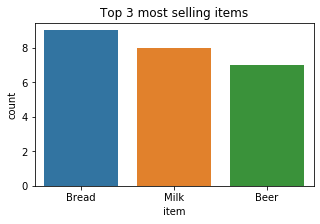

In [23]:
plt.figure(figsize=(5, 3))
order = transaction_df['item'].value_counts()[:3].index
sns.countplot(x='item', data=transaction_df, order = order)
plt.title("Top 3 most selling items")
plt.show()

## mlxtend 라이브러리 학습을 위한 데이터 포맷 변경

In [24]:
from mlxtend.preprocessing import TransactionEncoder

dataset = []

# 2개 이상의 item으로 이루어진 itemset만 사용
for transaction, df in transaction_df.groupby('transaction'):
    item_list = list(df['item'].unique())
    if len(item_list) > 1:
        dataset.append(item_list)
        
dataset

[['Bread', 'Milk'],
 ['Bread', 'Diapers', 'Beer', 'Eggs'],
 ['Milk', 'Diapers', 'Beer', 'Cola'],
 ['Bread', 'Milk', 'Diapers', 'Beer'],
 ['Bread', 'Milk', 'Diapers', 'Cola'],
 ['Bread', 'Milk'],
 ['Bread', 'Cola', 'Beer', 'Milk'],
 ['Milk', 'Bread', 'Beer', 'Cola'],
 ['Bread', 'Milk', 'Diapers', 'Beer'],
 ['Bread', 'Beer', 'Diapers']]

In [25]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

In [26]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Beer,Bread,Cola,Diapers,Eggs,Milk
0,False,True,False,False,False,True
1,True,True,False,True,True,False
2,True,False,True,True,False,True
3,True,True,False,True,False,True
4,False,True,True,True,False,True
5,False,True,False,False,False,True
6,True,True,True,False,False,True
7,True,True,True,False,False,True
8,True,True,False,True,False,True
9,True,True,False,True,False,False


## frequent itemset 생성

In [28]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.7,(Beer)
1,0.9,(Bread)
2,0.4,(Cola)
3,0.6,(Diapers)
4,0.8,(Milk)
5,0.6,"(Bread, Beer)"
6,0.3,"(Cola, Beer)"
7,0.5,"(Diapers, Beer)"
8,0.5,"(Milk, Beer)"
9,0.3,"(Bread, Cola)"


#### minimum confidence 이상의 association rule 생성 및 추천

In [30]:
result = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
result[(result['antecedents'] == frozenset(['Beer']))].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Beer),(Diapers),0.7,0.6,0.5,0.714286,1.190476,0.08,1.400000
29,(Beer),"(Diapers, Bread)",0.7,0.5,0.4,0.571429,1.142857,0.05,1.166667
3,(Beer),(Cola),0.7,0.4,0.3,0.428571,1.071429,0.02,1.050000
41,(Beer),"(Milk, Cola)",0.7,0.4,0.3,0.428571,1.071429,0.02,1.050000
47,(Beer),"(Diapers, Milk)",0.7,0.4,0.3,0.428571,1.071429,0.02,1.050000
1,(Beer),(Bread),0.7,0.9,0.6,0.857143,0.952381,-0.03,0.700000
7,(Beer),(Milk),0.7,0.8,0.5,0.714286,0.892857,-0.06,0.700000
35,(Beer),"(Bread, Milk)",0.7,0.7,0.4,0.571429,0.816327,-0.09,0.700000


#### minimum lift 이상의 association rule 생성 및 추천
- 보통은 minimum confidence로 rule을 cutoff하고 lift로 정렬하여 사용

In [31]:
result = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)
result[(result['antecedents']==frozenset(['Beer']))].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Beer),(Diapers),0.7,0.6,0.5,0.714286,1.190476,0.08,1.400000
7,(Beer),"(Diapers, Bread)",0.7,0.5,0.4,0.571429,1.142857,0.05,1.166667


# 03. Online retail 데이터를 활용한 association rule 생성
- 실제 데이터를 사용해서 간단한 연관 규칙 기반 상품 추천 시스템 생성

## Preprocessing

In [35]:
path = "../data/online_retail.csv"
parse_date = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M')
retail_df = pd.read_csv(path, encoding='utf-8', parse_dates=['InvoiceDate'], date_parser = parse_date)

#### quantity가 음수인 데이터는 제거

In [36]:
retail_df = retail_df[retail_df.Quantity > 0]
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      531285 non-null object
StockCode      531285 non-null object
Description    530693 non-null object
Quantity       531285 non-null int64
InvoiceDate    531285 non-null datetime64[ns]
UnitPrice      531285 non-null float64
CustomerID     397924 non-null float64
Country        531285 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [39]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### 총 아이템 개수

In [37]:
retail_df['StockCode'].nunique()

3941

#### 아이템 별 트랜잭션 등장 수 분포

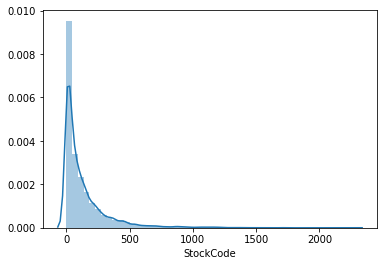

In [38]:
sns.distplot(retail_df['StockCode'].value_counts())
plt.show()

## 트랜잭션 단위로 데이터프레임 변환

In [40]:
transaction_df = pd.DataFrame({
    "items" : retail_df.groupby(['InvoiceNo'])['StockCode'].apply(set),
    "item_length" : retail_df.groupby(['InvoiceNo'])["StockCode"].nunique()
}).reset_index()

transaction_df

,InvoiceNo,items,item_length
0,536365,"{71053, 22752, 84406B, 85123A, 21730, 84029E, ...",7
1,536366,"{22632, 22633}",2
2,536367,"{22623, 21755, 21754, 21777, 84879, 22749, 227...",12
3,536368,"{22960, 22912, 22913, 22914}",4
4,536369,{21756},1
...,...,...,...
20723,581586,"{21217, 22061, 23275, 20685}",4
20724,581587,"{23255, 22631, 23256, 22555, 22730, 22728, 227...",15
20725,A563185,{B},1
20726,A563186,{B},1


In [41]:
transaction_df[transaction_df.item_length > 1]

,InvoiceNo,items,item_length
0,536365,"{71053, 22752, 84406B, 85123A, 21730, 84029E, ...",7
1,536366,"{22632, 22633}",2
2,536367,"{22623, 21755, 21754, 21777, 84879, 22749, 227...",12
3,536368,"{22960, 22912, 22913, 22914}",4
5,536370,"{10002, POST, 22540, 21731, 21883, 21724, 2272...",20
...,...,...,...
20720,581583,"{85038, 20725}",2
20721,581584,"{20832, 85038}",2
20722,581585,"{21916, 16016, 22178, 84879, 22398, 23084, 849...",21
20723,581586,"{21217, 22061, 23275, 20685}",4


## frequent itemset 생성

In [44]:
from mlxtend.preprocessing import TransactionEncoder

dataset = []

# 2개 이상의 item으로 이루어진 itemset만 사용한다
for index, row in transaction_df[transaction_df.item_length > 1].reset_index().iterrows():
    dataset.append(list(row['items']))
    
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_)
df

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,DOT,M,PADS,POST,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18334,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
%%time

min_support = 0.01
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

Wall time: 6min 4s


In [46]:
%%time

min_support = 0.01
frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)

Wall time: 12.8 s


## Association rule 생성 및 상품 추천

In [47]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
0,0.119042,(85123A)
98,0.113317,(85099B)
328,0.107264,(22423)
653,0.091122,(47566)
42,0.085287,(20725)
...,...,...
1215,0.010034,"(22379, 22666)"
2259,0.010034,"(85099B, 23182)"
2079,0.010034,"(85099B, DOT, 22666)"
1153,0.010034,"(85099B, 21559)"


#### itemset [85099B]가 주어졌을 때 가장 연관도가 높은 아이템 10개 추천

In [48]:
min_confidence = 0.2
k = 10

given_itemset = ['85099B']
result = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
result[(result['antecedents'] == frozenset(given_itemset))].sort_values(by='lift', ascending=False)[:k]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2870,(85099B),(DOT),0.113317,0.038608,0.026448,0.233397,6.045259,0.022073,1.254094
157,(85099B),(22386),0.113317,0.066310,0.044989,0.397016,5.987242,0.037474,1.548449
2321,(85099B),(21928),0.113317,0.043898,0.029502,0.260346,5.930725,0.024527,1.292635
1611,(85099B),(85099F),0.113317,0.044443,0.029283,0.258422,5.814644,0.024247,1.288544
212,(85099B),(85099C),0.113317,0.050551,0.031901,0.281521,5.569068,0.026173,1.321471
3334,(85099B),(22385),0.113317,0.037463,0.023449,0.206930,5.523548,0.019203,1.213684
2037,(85099B),(20712),0.113317,0.047006,0.029174,0.257459,5.477129,0.023848,1.283423
179,(85099B),(21931),0.113317,0.064565,0.039481,0.348412,5.396265,0.032165,1.435623
305,(85099B),(21929),0.113317,0.047170,0.028247,0.249278,5.284697,0.022902,1.269219
665,(85099B),(22411),0.113317,0.064020,0.037081,0.327238,5.111487,0.029827,1.391249


# 04. Association Rule Mining class

In [49]:
# 정리된 class 형태로 만들어보자.

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

class AssociationRuleMining(object):
    
    def __init__(self, min_supp, min_conf):
        """ Parameters setting
        """
        self.min_supp = min_supp  # min support (used for mining frequent itemsets)
        self.min_conf = min_conf  # min confidence (used for mining association rules)

    def fit(self, dataset, algo):
        """ Run the apriori/fpgrowth algorithm, return the frequent k-term sets and association rules. 
        """
        
        te = TransactionEncoder()
        te_ary = te.fit(dataset).transform(dataset)
        df = pd.DataFrame(te_ary, columns=te.columns_)
        
        if algo == 'apriori':
            self.frequent_itemsets = apriori(df, min_support = self.min_supp, use_colnames = True)
        elif algo == 'fpgrowth':
            self.frequent_itemsets = fpgrowth(df, min_support = self.min_supp, use_colnames = True)
        else:
            raise Exception('A wrong algorithm name')
        
        self.result = association_rules(frequent_itemsets, metric = "confidence", min_threshold = self.min_conf)
    
    def get_available_recommend_items(self):
        """ Get 1-freq item lists greater than minimum support 
        """
        tmp_df = self.result
        return [list(x)[0] for x in tmp_df[tmp_df['antecedents'].str.len() == 1]['antecedents'].unique().tolist()]
        
    
    def recommend_item(self, item_id, min_conf = None):
        """ Get 1-freq recommend item list sorted by lift, greater than minimum confidence 
        """
        if min_conf is None:
            tmp_df = self.result
        else:
            tmp_df = association_rules(frequent_itemsets, metric = "confidence", min_threshold = min_conf)
        
        tmp_df = tmp_df[(tmp_df['antecedents'] == frozenset([item_id])) & \
                        (tmp_df['consequents'].str.len() == 1)].sort_values(by='lift', ascending = False)
        
        return tmp_df[['consequents', 'confidence', 'lift']]
    
    def get_suppport(self, items):
        """ Get support from item list
        """
        tmp_df = self.frequent_itemsets
        return tmp_df[tmp_df['itemsets'] == frozenset(items)]['support'].values[0]
        

In [50]:
objARM = AssociationRuleMining(min_supp = 0.01, min_conf = 0.01)
objARM.fit(dataset, 'fpgrowth')
objARM.result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22633),(22865),0.026066,0.035609,0.012869,0.493724,13.865096,0.011941,1.904871
1,(22865),(22633),0.035609,0.026066,0.012869,0.361409,13.865096,0.011941,1.525129
2,(22866),(22633),0.029829,0.026066,0.011724,0.393053,15.079093,0.010947,1.604644
3,(22633),(22866),0.026066,0.029829,0.011724,0.449791,15.079093,0.010947,1.763277
4,(22867),(22633),0.030210,0.026066,0.010088,0.333935,12.811089,0.009301,1.462221
...,...,...,...,...,...,...,...,...,...
5635,(22633),(23439),0.026066,0.021649,0.010361,0.397490,18.360613,0.009797,1.623791
5636,(23439),(22865),0.021649,0.035609,0.011888,0.549118,15.420724,0.011117,2.138900
5637,(22865),(23439),0.035609,0.021649,0.011888,0.333844,15.420724,0.011117,1.468651
5638,(22866),(23439),0.029829,0.021649,0.010852,0.363803,16.804563,0.010206,1.537810


## AssociationRuleMining class method를 활용한 연관분석 추천 제공
- minimum support를 만족하는 상품, 즉 frequent itemset에 존재하는 상품이어야 연관분석이 가능하다

In [51]:
recommend_list = objARM.get_available_recommend_items()
recommend_list[:20]

['22633',
 '22865',
 '22866',
 '22867',
 '22632',
 '84879',
 '85123A',
 '22423',
 '47566',
 '21754',
 '21755',
 '22748',
 '22745',
 '22960',
 '22961',
 '85099B',
 '22197',
 '21212',
 '22457',
 '20725']

In [52]:
# support가 상대적으로 높은 item의 경우 association rule이 많다.

item_id = '85099B'
print('support: ', objARM.get_suppport([item_id]))
objARM.recommend_item(item_id)

support:  0.11331661031737376


,consequents,confidence,lift
3836,(DOT),0.233397,6.045259
245,(22386),0.397016,5.987242
3137,(21928),0.260346,5.930725
2219,(85099F),0.258422,5.814644
3333,(20711),0.165544,5.804478
...,...,...,...
5181,(23298),0.107315,1.721730
5518,(23084),0.089509,1.699191
1224,(85123A),0.192974,1.621052
951,(22086),0.100577,1.599644


In [53]:
# association rule이 많은 경우에 minimum confidence 값을 높게 잡기도 한다.
objARM.recommend_item(item_id, min_conf=0.3)

,consequents,confidence,lift
75,(22386),0.397016,5.987242
86,(21931),0.348412,5.396265
429,(22411),0.327238,5.111487


In [54]:
# support가 상대적으로 낮은 item의 경우 association rule이 적다.

item_id = '20713'
print('support: ', objARM.get_suppport([item_id]))
objARM.recommend_item(item_id)

support:  0.03544552295779256


,consequents,confidence,lift
2304,(DOT),0.383077,9.922125
2289,(20712),0.433846,9.229548
2307,(22385),0.303077,8.089992
2297,(21928),0.350769,7.990567
2301,(21930),0.304615,7.957318
2295,(85099C),0.395385,7.821535
2285,(21931),0.490769,7.601120
2299,(22379),0.306154,7.515729
2287,(85099F),0.303077,6.819417
2291,(22386),0.430769,6.496255
